In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.cluster import normalized_mutual_info_score


In [88]:
tree = uproot.open("100eventsNMIcheck.root")['trackTree'].arrays()

# tree['IdentificationMap']
# tree

/home/lorenzo/.local/lib/python3.8/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return cls.numpy.array(value, copy=False)


In [89]:
keys = np.asarray(tree[b"IdentificationMap.first"])
value = np.asarray(tree[b"IdentificationMap.second"])

value = value.reshape(100,9)

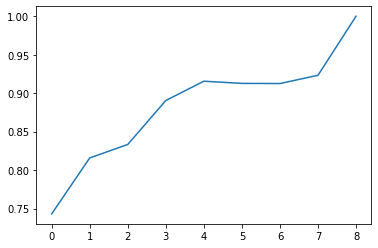

In [97]:
plt.plot(pd.DataFrame(np.array([normalized_mutual_info_score(i, lst[-1]) for lst in value for i in lst]).reshape(100,9)).mean())

plt.show()

,0,1,2,3,4,5,6,7,8
0,0.815462,8.382314e-01,8.635396e-01,8.907758e-01,8.900305e-01,9.026038e-01,9.380916e-01,9.001658e-01,1.0
1,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0
2,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0
3,0.000000,0.000000e+00,8.821103e-01,8.821103e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0
4,0.783909,7.758219e-01,5.663175e-01,6.837167e-01,9.619936e-01,9.524041e-01,9.524041e-01,9.524041e-01,1.0
5,0.072087,1.455639e-15,1.455639e-15,1.455639e-15,1.455639e-15,1.455639e-15,1.455639e-15,1.455639e-15,1.0
6,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0
7,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0
8,0.778289,6.671316e-01,8.487715e-01,9.275661e-01,9.275661e-01,9.226336e-01,9.226336e-01,9.226336e-01,1.0
9,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0


## Comparison Hough Ransac

In [54]:
treeHough = uproot.open("provaHough.root")['trackTree'].arrays()
treeRansac = uproot.open("100eventsNMIcheck.root")['trackTree'].arrays()


In [65]:
valueHough = np.asarray(treeHough[b"identificationMap.second"]).reshape(1,25)
valueRansac = np.asarray(treeRansac[b"IdentificationMap.second"]).reshape(100,9)


targetRansac = pd.DataFrame(valueRansac).iloc[:2,-1]

[i.shape for i in np.asarray(treeRansac[b"IdentificationMap.second"])]


[(1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1398,),
 (1398,),
 (1398,),
 (1398,),
 (1398,),
 (1398,),
 (1398,),
 (1398,),
 (1398,),
 (1777,),
 (1777,),
 (1777,),
 (1777,),
 (1777,),
 (1777,),
 (1777,),
 (1777,),
 (1777,),
 (749,),
 (749,),
 (749,),
 (749,),
 (749,),
 (749,),
 (749,),
 (749,),
 (749,),
 (1373,),
 (1373,),
 (1373,),
 (1373,),
 (1373,),
 (1373,),
 (1373,),
 (1373,),
 (1373,),
 (1081,),
 (1081,),
 (1081,),
 (1081,),
 (1081,),
 (1081,),
 (1081,),
 (1081,),
 (1081,),
 (1811,),
 (1811,),
 (1811,),
 (1811,),
 (1811,),
 (1811,),
 (1811,),
 (1811,),
 (1811,),
 (480,),
 (480,),
 (480,),
 (480,),
 (480,),
 (480,),
 (480,),
 (480,),
 (480,),
 (753,),
 (753,),
 (753,),
 (753,),
 (753,),
 (753,),
 (753,),
 (753,),
 (753,),
 (1210,),
 (1210,),
 (1210,),
 (1210,),
 (1210,),
 (1210,),
 (1210,),
 (1210,),
 (1210,),
 (2240,),
 (2240,),
 (2240,),
 (2240,),
 (2240,),
 (2240,),
 (2240,),
 (2240,),
 (2240,),
 (2059,),
 (2059,),
 (2059,),
 (2059,

In [75]:
# check lengths 
valueHough = np.asarray(treeHough[b"identificationMap.second"]).reshape(1,25)
[j.shape  for i in valueHough for j in i]


valueRansac = np.asarray(treeRansac[b"IdentificationMap.second"]).reshape(100,9)
pd.DataFrame(np.asarray([j.shape  for i in valueRansac for j in i]).reshape(100,9)).iloc[:2,-1]


targetRansac = pd.DataFrame(valueRansac).iloc[:2,-1]
[i.shape for i in targetRansac]



[lstR.shape for lstH, lstR in zip(valueHough, targetRansac) for i in lstH]

[(1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,),
 (1411,)]

In [76]:
# plt.plot(pd.DataFrame(np.array([normalized_mutual_info_score(i, lst[-1]) for lst in value for i in lst]).reshape(100,9)).mean())
[normalized_mutual_info_score(i, lstR) for lstH, lstR in zip(valueHough, targetRansac) for i in lstH]

[0.04430649455996034,
 0.18256147942841755,
 0.3562523634491835,
 0.25860907253398974,
 0.5732110574826467,
 0.04781138197688851,
 0.18256147942841755,
 0.4129377699403768,
 0.33804190061984624,
 0.7463664086689051,
 0.04893756843375777,
 0.07283587213185519,
 0.23519367857354762,
 0.6341534514868765,
 0.8580792438219473,
 0.046196420138630616,
 0.07283587213185519,
 0.46693675197043416,
 0.43772019167532605,
 0.8733170782947226,
 0.04919637856110653,
 0.05790588691052623,
 0.3961186646803067,
 0.3902547289804391,
 0.7847302057519818]

(2,)

In [30]:
[normalized_mutual_info_score(i, lstR) for lstH, lstR in zip(valueHough, targetRansac) for i in lstH]


for it in range(2):

    normalized_mutual_info_score(valueHough[it,1], targetRansac[it])

ValueError: labels_true must be 1D: shape is ()

In [34]:
targetRansac[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [37]:
valueHough.shape

(50,)